#What is Logistic Regression?

##Logistic Regression


**Logistic Regression** is a statistical method and **supervised learning algorithm** used for predicting the probability of a **binary outcome** (e.g., yes/no, 0/1, present/absent) based on one or more independent variables.

## How It Works

It works by transforming a linear equation into a probability by applying the **logistic (or sigmoid) function**.

The sigmoid function is essential because it:
* Ensures the output is always between **0 and 1**.
* Effectively models the **odds** of the event occurring.

## Primary Use

The primary use of Logistic Regression is to understand the relationship between **predictor variables** and a **dichotomous dependent variable** and to make classifications.

* In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1.

<img src = "https://files.virgool.io/upload/users/136298/posts/q69uus9qkeva/cbimd9voqvaf.png">

## Sigmoid Function
The **sigmoid function** maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

<img src = "https://miro.medium.com/max/1400/0*_5zUFVIAXwzBSgAR.png" width=50%>

## Odds and Log-Odds

- **Odds**: The ratio of the probability of an event happening to it not happening:

$$
\text{Odds} = \frac{P(y=1)}{P(y=0)}
$$

- **Log-Odds (Logit)**: Logistic regression models the log of the odds:

$$
\text{logit}(p) = \ln\frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n
$$

- Log-odds, also known as the logit function, transform these odds into a continuous, symmetrical scale by taking their natural logarithm (log(odds))

## What is a Decision Surface/Boundary?

* A **Decision Surface** (or **Decision Boundary**) is the region in a problem space where the output label of a classifier is **ambiguous**. This boundary can be **linear** or **non-linear**.
* In **binary classification**, the decision boundary is typically defined as the place where the probability of a sample belonging to each class ($y=0$ and $y=1$) is **equal**.
* A decision boundary hyperplane always has **one less dimension** than the feature space. For example, in a 2D feature space, the boundary is a 1D line.


The predicted probability is:

$$
\hat{y} = \sigma(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)
$$

Classification rule:

$$
\hat{y} \ge 0.5 \Rightarrow \text{class 1}, \quad \hat{y} < 0.5 \Rightarrow \text{class 0}
$$


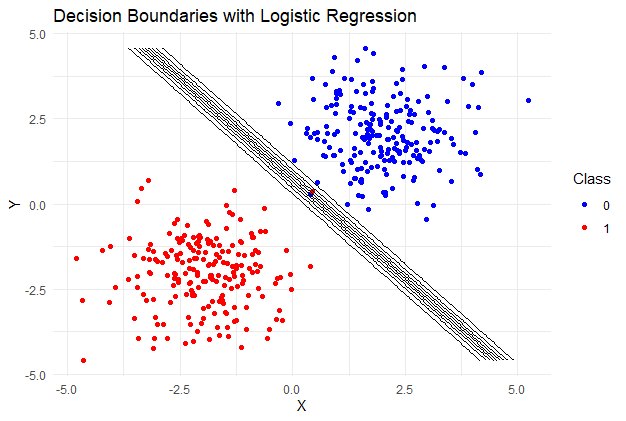

###When is a Non-linear Boundary Needed?

Non-linear boundaries are created by models like **Support Vector Machines (SVMs)** with a non-linear kernel, **Decision Trees**, or **Neural Networks** when the relationship between the features and the outcome is complex and cannot be modeled by a simple straight line or plane.

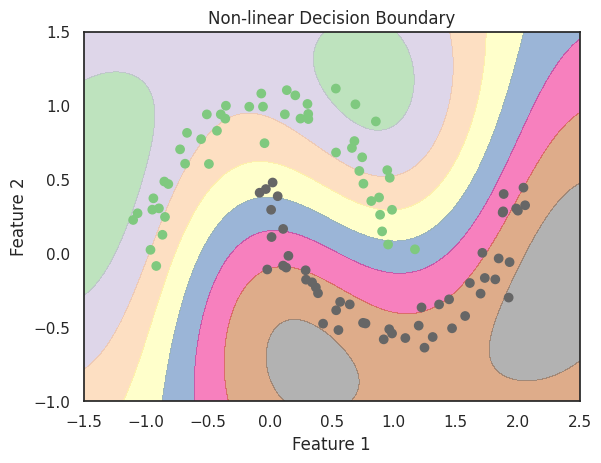

## Cost Function: Log Loss (Cross-Entropy Loss)

**Log Loss**, also known as **Cross-Entropy Loss**, is a fundamental performance metric used primarily in **binary classification** problems, particularly within **Logistic Regression**.

## Purpose

The main function of Log Loss is to **quantify the error** between a model's predicted probabilities and the actual true class labels.

It measures the "distance" from perfection:
* It **penalizes confident but incorrect predictions heavily**. If the model predicts a probability of $0.99$ for a sample belonging to class 'A', but the actual label is class 'B', the penalty will be extremely large.
* Conversely, confident and correct predictions result in a loss very close to zero.

## Calculation

The Log Loss function is calculated by taking the **average of the loss** for all individual training examples. Minimizing this average loss is the primary objective during the model training process.

$$
\text{Log Loss} = - \frac{1}{N} \sum_{i=1}^N \Big[ y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) \Big]
$$

The model **minimizes this function** during training.


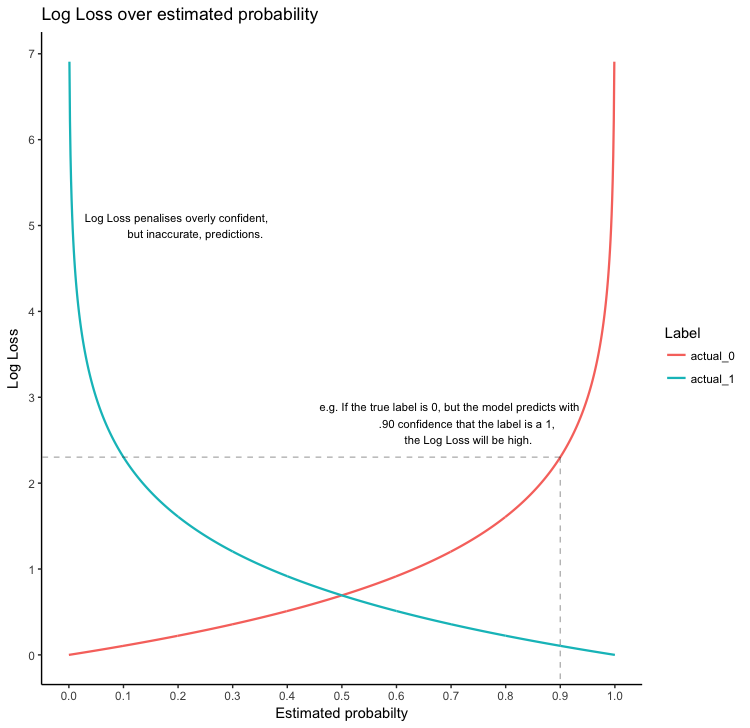

## Threshold in Logistic Regression

The **threshold** is a probability value that determines the final binary classification of an outcome, converting the model's predicted probability into a definitive "yes" or "no" prediction.

---

## Key Concepts

* **Default Value:** The standard, default threshold is **0.5**.
* **Adjustment:** The threshold is often adjusted based on **business requirements** or to optimize the balance between different types of classification errors, such as **false positives** and **false negatives**.

---

## How the Threshold Works

The classification process involves three main steps:

1. **Probability Prediction:**  
   The Logistic Regression model outputs a probability score (a value between 0 and 1) for a given outcome.

2. **Comparison:**  
   This predicted probability $P$ is then compared against the chosen threshold $T$.

3. **Decision:**  
   * **Positive Classification:**  

   $$
   \text{If } P \ge T, \text{ classify as Positive (1)}
   $$

   * **Negative Classification:**  

   $$
   \text{If } P < T, \text{ classify as Negative (0)}
   $$


#Binary Classification
In this section, we will use [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) of scikit-learn which is a classic binary classification dataset used for machine learning. This dataset contains multiple features for tumors as well as it's label (either benign or malignant).

In [18]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [10]:
# Convert to pandas DataFrame for easier exploration
df = pd.DataFrame(data.data, columns=data.feature_names)

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df['target'] = data.target

In [14]:
X = df.drop('target', axis=1)  # Features
y = df['target']               # Labels (0: malignant, 1: benign)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)

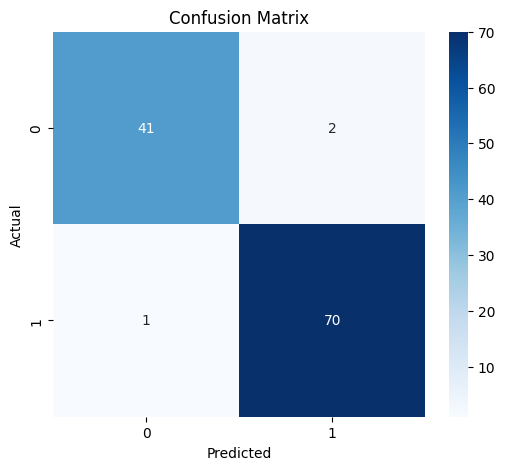

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



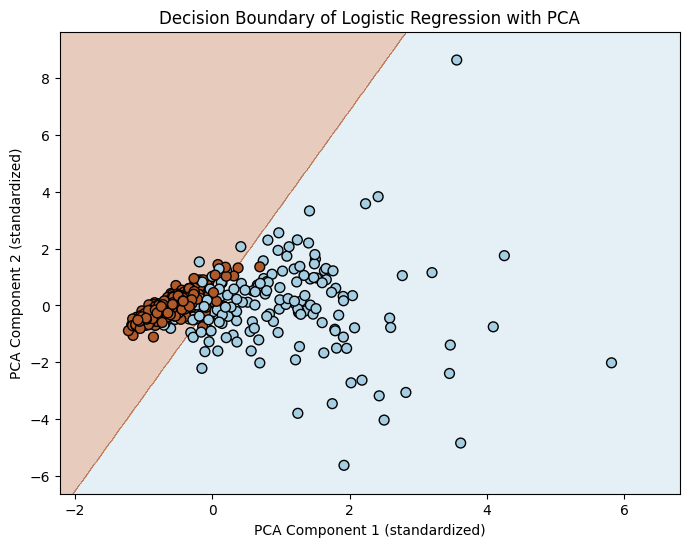

In [31]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train-test split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Standardize
scaler_pca = StandardScaler()
X_train_pca = scaler_pca.fit_transform(X_train_pca)
X_test_pca = scaler_pca.transform(X_test_pca)

# Train Logistic Regression
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Create a meshgrid for plotting
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on meshgrid
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, s=50, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('PCA Component 1 (standardized)')
plt.ylabel('PCA Component 2 (standardized)')
plt.title('Decision Boundary of Logistic Regression with PCA')
plt.show()


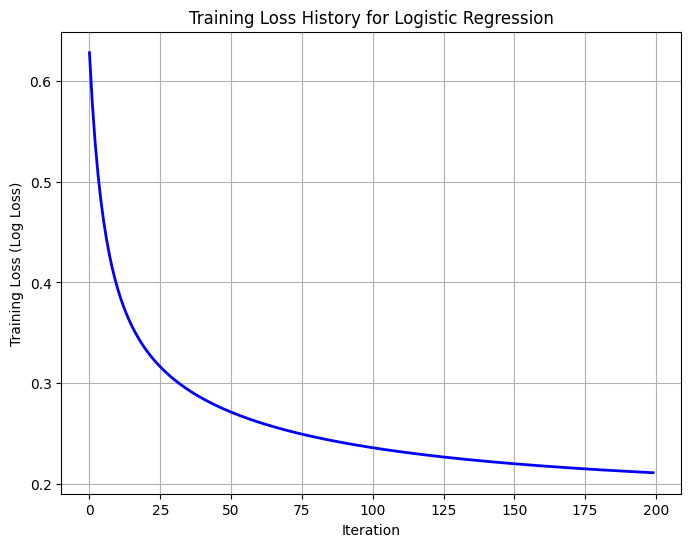

In [32]:
# Gradient Descent for Logistic Regression (Tracking Loss)
def gradient_descent(X, y, theta, lr=0.1, num_iter=200):
    m = len(y)
    loss_history = []

    for i in range(num_iter):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= lr * gradient

        # Compute and store cost
        cost = compute_cost(theta, X, y)
        loss_history.append(cost)

    return theta, loss_history

# Initialize theta
theta_init = np.zeros(X_train_intercept.shape[1])

# Run gradient descent
theta_opt, loss_history = gradient_descent(X_train_intercept, y_train_pca, theta_init, lr=0.5, num_iter=200)

# Plot Loss History
plt.figure(figsize=(8,6))
plt.plot(loss_history, color='blue', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Training Loss (Log Loss)')
plt.title('Training Loss History for Logistic Regression')
plt.grid(True)
plt.show()
